In [5]:
###Globals

In [6]:
history = {}
val_performance = {}
performance = {}

SEED = 3

# Only using accumulation

In [7]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os


random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)




file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

input_columns = list(np.arange(1600, 2308, 1))


linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

history['lstm_accumulation'] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_accumulation'] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_accumulation'] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor('white')
ax.plot(history['lstm_accumulation'].history['loss'], label='Train Loss',linewidth=3, c='steelblue')
ax.plot(history['lstm_accumulation'].history['val_loss'], label='Val Loss',linewidth=3, c='brown')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('LSTM - Only Using Accumulation Zone')
ax.legend()
ax.grid()

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708


KeyboardInterrupt: 

# Only using ablation

In [ ]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

input_columns = list(np.arange(0, 1600, 1))


linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

history['lstm_ablation'] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_ablation'] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_ablation'] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor('white')
ax.plot(history['lstm_ablation'].history['loss'], label='Train Loss',linewidth=3, c='steelblue')
ax.plot(history['lstm_ablation'].history['val_loss'], label='Val Loss',linewidth=3, c='brown')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('LSTM - Only Using Ablation Zone')
ax.legend()
ax.grid()

# Using the whole cable

In [ ]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
ww = 200
bs = 32

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

input_columns = list(np.arange(0, 2308, 1))


linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

history['lstm_whole_cable'] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(5,5))
fig.patch.set_facecolor('white')
ax.plot(history['lstm_whole_cable'].history['loss'], label='Train Loss',linewidth=3, c='steelblue')
ax.plot(history['lstm_whole_cable'].history['val_loss'], label='Val Loss',linewidth=3, c='brown')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('LSTM - Whole Cable')
ax.legend()
ax.grid()

# All plots together

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(7,7))
fig.patch.set_facecolor('white')

#Whole Cable
ax.plot(history['lstm_whole_cable'].history['val_loss'],linewidth=2, label='Val Loss',linestyle = '--',c='black')
ax.plot(history['lstm_whole_cable'].history['val_loss'],linewidth=2, linestyle = '--',c='purple')
ax.plot(history['lstm_whole_cable'].history['loss'], label='Whole Cable',linewidth=2, c='purple')

#Accumulation
ax.plot(history['lstm_accumulation'].history['loss'], label='Accumulation Zone',linewidth=2, c='darkorange')
ax.plot(history['lstm_accumulation'].history['val_loss'],linewidth=2, linestyle = '--',c='darkorange')

#Ablation
ax.plot(history['lstm_ablation'].history['loss'], label='Ablation Zone',linewidth=2, c='forestgreen')
ax.plot(history['lstm_ablation'].history['val_loss'],linewidth=2, linestyle = '--',c='forestgreen')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('LSTM - Cable Sensitivity')
ax.legend()
ax.grid()

# Test Performance

In [1]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

2022-11-03 15:00:36.092347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


ModuleNotFoundError: No module named 'attr'

In [9]:
history = {}
val_performance = {}
performance = {}

seeds = list(np.arange(1,26,1))
input_columns = [list(np.arange(0, 2308, 1)), list(np.arange(0, 1600, 1)), list(np.arange(1600, 2308, 1))]
location = ['Whole Cable', 'Ablation Zone', 'Accumulation Zone']

for SEED in seeds:
    
    for ic, loc in zip(input_columns, location):
        

        file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

        filt = 'Highpass'

        ww = 200
        bs = 32

        random.seed(SEED)
        np.random.seed(SEED)
        tf.random.set_seed(SEED)


        linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = ic)

        da = df_all_chan.to_numpy()

        multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                        input_width=ww,
                                                        label_width=1, 
                                                        shift=0,
                                                        label_columns=['Discharge'],
                                                        input_columns=ic,
                                                        shuffle=True,
                                                        batch_size=bs)

        history['lstm '+loc+' '+str(SEED)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

        val_performance['lstm '+loc+' '+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.val)
        performance['lstm '+loc+' '+str(SEED)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


<ipython-input-9-237bafb3eb1c>:21: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 279ms/step - loss: 0.8887 - mean_absolute_error: 0.7776 - val_loss: 0.7887 - val_mean_absolute_error: 0.6860
Epoch 2/1000
7/7 [==============================] - 2s 240ms/step - loss: 0.5029 - mean_absolute_error: 0.5529 - val_loss: 0.5611 - val_mean_absolute_error: 0.5170
Epoch 3/1000
7/7 [==============================] - 2s 241ms/step - loss: 0.3165 - mean_absolute_error: 0.4408 - val_loss: 0.4277 - val_mean_absolute_error: 0.4563
Epoch 4/1000
7/7 [==============================] - 2s 244ms/step - loss: 0.2538 - mean_absolute_error: 0.3796 - val_loss: 0.4809 - val_mean_absolute_error: 0.4639
Epoch 5/1000
7/7 [==============================] - 2s 241ms/step - loss: 0.1986 - mean_absolute_error: 0.3231 - val_loss: 0.3820 - val_mean_absolute_error: 0.4363
Epoch 6/1000
7/7 [==============================] - 2s 239ms/step - loss: 0.1726 - mean_absolute_error: 0.2924 - val_lo

7/7 [==============================] - 1s 94ms/step - loss: 0.1128 - mean_absolute_error: 0.2357 - val_loss: 0.3085 - val_mean_absolute_error: 0.3567
Epoch 37/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.1025 - mean_absolute_error: 0.2303 - val_loss: 0.3129 - val_mean_absolute_error: 0.3473
Epoch 38/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0964 - mean_absolute_error: 0.2240 - val_loss: 0.2853 - val_mean_absolute_error: 0.3272
Epoch 39/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.0890 - mean_absolute_error: 0.2134 - val_loss: 0.2983 - val_mean_absolute_error: 0.3657
Epoch 40/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.0765 - mean_absolute_error: 0.1965 - val_loss: 0.3108 - val_mean_absolute_error: 0.3885
Epoch 41/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0694 - mean_absolute_error: 0.1881 - val_loss: 0.3057 - val_mean_absolute_error: 0.3627
Epoch 42/1000
7/7 [===========

7/7 [==============================] - 1s 90ms/step - loss: 0.0088 - mean_absolute_error: 0.0712 - val_loss: 0.1928 - val_mean_absolute_error: 0.2036
Epoch 87/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0059 - mean_absolute_error: 0.0572 - val_loss: 0.1951 - val_mean_absolute_error: 0.2576
Epoch 88/1000
7/7 [==============================] - 1s 88ms/step - loss: 0.0103 - mean_absolute_error: 0.0760 - val_loss: 0.1941 - val_mean_absolute_error: 0.2416
Epoch 89/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0133 - mean_absolute_error: 0.0909 - val_loss: 0.2087 - val_mean_absolute_error: 0.1937
Epoch 90/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0099 - mean_absolute_error: 0.0745 - val_loss: 0.2544 - val_mean_absolute_error: 0.2643
Epoch 91/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0180 - mean_absolute_error: 0.0987 - val_loss: 0.2301 - val_mean_absolute_error: 0.2528
Epoch 92/1000
7/7 [===========

Epoch 31/1000
7/7 [==============================] - 1s 215ms/step - loss: 0.0026 - mean_absolute_error: 0.0375 - val_loss: 0.1290 - val_mean_absolute_error: 0.1681
Epoch 32/1000
7/7 [==============================] - 1s 211ms/step - loss: 0.0034 - mean_absolute_error: 0.0415 - val_loss: 0.1316 - val_mean_absolute_error: 0.1640
Epoch 33/1000
7/7 [==============================] - 1s 219ms/step - loss: 0.0031 - mean_absolute_error: 0.0404 - val_loss: 0.1332 - val_mean_absolute_error: 0.1710
Epoch 34/1000
2/2 [==============================] - 0s 102ms/step - loss: 0.1309 - mean_absolute_error: 0.1701
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
1600
Epoch 1/1000
7/7 [==============================] - 2s 215ms/step - loss: 0.8145 - mean_absolute_error: 0.7163 - val_loss: 0.3413 - val_mean_absolute_error: 0.4390
Epoch 2/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.3784 - mean_absolute_error: 0.4849 - val_loss: 0.3252 - val_mean_absolute_error: 0.4722
Epoc

Epoch 10/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.3182 - mean_absolute_error: 0.4406 - val_loss: 0.3702 - val_mean_absolute_error: 0.4745
Epoch 11/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.2780 - mean_absolute_error: 0.4052 - val_loss: 0.3489 - val_mean_absolute_error: 0.4584
Epoch 12/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.2610 - mean_absolute_error: 0.3904 - val_loss: 0.3573 - val_mean_absolute_error: 0.4587
Epoch 13/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.2355 - mean_absolute_error: 0.3663 - val_loss: 0.3299 - val_mean_absolute_error: 0.4351
Epoch 14/1000
7/7 [==============================] - 1s 100ms/step - loss: 0.2281 - mean_absolute_error: 0.3599 - val_loss: 0.3197 - val_mean_absolute_error: 0.4249
Epoch 15/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.2140 - mean_absolute_error: 0.3414 - val_loss: 0.3106 - val_mean_absolute_error: 0.4198
Epoch 16/10

Epoch 29/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.0161 - mean_absolute_error: 0.0775 - val_loss: 0.1100 - val_mean_absolute_error: 0.1848
Epoch 30/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.0169 - mean_absolute_error: 0.0867 - val_loss: 0.1247 - val_mean_absolute_error: 0.1736
Epoch 31/1000
7/7 [==============================] - 1s 174ms/step - loss: 0.0210 - mean_absolute_error: 0.0901 - val_loss: 0.1454 - val_mean_absolute_error: 0.2202
Epoch 32/1000
7/7 [==============================] - 1s 170ms/step - loss: 0.0249 - mean_absolute_error: 0.1069 - val_loss: 0.1067 - val_mean_absolute_error: 0.1763
Epoch 33/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.0201 - mean_absolute_error: 0.0957 - val_loss: 0.0907 - val_mean_absolute_error: 0.1793
Epoch 34/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.0180 - mean_absolute_error: 0.0928 - val_loss: 0.0973 - val_mean_absolute_error: 0.1622
Epoch 35/1

Epoch 31/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0244 - mean_absolute_error: 0.1077 - val_loss: 0.1195 - val_mean_absolute_error: 0.2031
Epoch 32/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0208 - mean_absolute_error: 0.0995 - val_loss: 0.1034 - val_mean_absolute_error: 0.1921
Epoch 33/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0145 - mean_absolute_error: 0.0840 - val_loss: 0.0844 - val_mean_absolute_error: 0.1738
Epoch 34/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0111 - mean_absolute_error: 0.0723 - val_loss: 0.0940 - val_mean_absolute_error: 0.1662
Epoch 35/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0090 - mean_absolute_error: 0.0596 - val_loss: 0.0927 - val_mean_absolute_error: 0.1522
Epoch 36/1000
2/2 [==============================] - 0s 71ms/step - loss: 0.0898 - mean_absolute_error: 0.1537
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708
Epoc

2/2 [==============================] - 0s 35ms/step - loss: 0.1414 - mean_absolute_error: 0.2719
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 2s 214ms/step - loss: 0.8833 - mean_absolute_error: 0.7476 - val_loss: 0.4191 - val_mean_absolute_error: 0.5050
Epoch 2/1000
7/7 [==============================] - 1s 181ms/step - loss: 0.4531 - mean_absolute_error: 0.5087 - val_loss: 0.3692 - val_mean_absolute_error: 0.4917
Epoch 3/1000
7/7 [==============================] - 1s 171ms/step - loss: 0.3511 - mean_absolute_error: 0.4538 - val_loss: 0.3066 - val_mean_absolute_error: 0.3938
Epoch 4/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.2576 - mean_absolute_error: 0.3741 - val_loss: 0.2337 - val_mean_absolute_error: 0.3656
Epoch 5/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.1872 - mean_absolute_error: 0.3197 - val_loss: 0.2050 - val_mean_absolute_error: 0.3248
Epoch 6/1000
7/7 [====

Epoch 49/1000
7/7 [==============================] - 1s 214ms/step - loss: 0.0047 - mean_absolute_error: 0.0361 - val_loss: 0.1023 - val_mean_absolute_error: 0.1571
Epoch 50/1000
7/7 [==============================] - 1s 220ms/step - loss: 0.0038 - mean_absolute_error: 0.0331 - val_loss: 0.1072 - val_mean_absolute_error: 0.1484
Epoch 51/1000
7/7 [==============================] - 1s 221ms/step - loss: 0.0035 - mean_absolute_error: 0.0287 - val_loss: 0.1140 - val_mean_absolute_error: 0.1562
Epoch 52/1000
7/7 [==============================] - 1s 215ms/step - loss: 0.0038 - mean_absolute_error: 0.0323 - val_loss: 0.1036 - val_mean_absolute_error: 0.1481
Epoch 53/1000
7/7 [==============================] - 1s 215ms/step - loss: 0.0033 - mean_absolute_error: 0.0283 - val_loss: 0.1026 - val_mean_absolute_error: 0.1509
Epoch 54/1000
7/7 [==============================] - 1s 214ms/step - loss: 0.0034 - mean_absolute_error: 0.0311 - val_loss: 0.1123 - val_mean_absolute_error: 0.1548
Epoch 55/1

Epoch 15/1000
7/7 [==============================] - 1s 158ms/step - loss: 0.0189 - mean_absolute_error: 0.0963 - val_loss: 0.1256 - val_mean_absolute_error: 0.2062
Epoch 16/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0160 - mean_absolute_error: 0.0887 - val_loss: 0.1293 - val_mean_absolute_error: 0.2093
Epoch 17/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0122 - mean_absolute_error: 0.0739 - val_loss: 0.1289 - val_mean_absolute_error: 0.2186
Epoch 18/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0136 - mean_absolute_error: 0.0819 - val_loss: 0.1204 - val_mean_absolute_error: 0.2032
Epoch 19/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0114 - mean_absolute_error: 0.0737 - val_loss: 0.1258 - val_mean_absolute_error: 0.1947
Epoch 20/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0093 - mean_absolute_error: 0.0648 - val_loss: 0.1313 - val_mean_absolute_error: 0.1932
Epoch 21/1

Epoch 42/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.0831 - mean_absolute_error: 0.1951 - val_loss: 0.2715 - val_mean_absolute_error: 0.3614
Epoch 43/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.0699 - mean_absolute_error: 0.1980 - val_loss: 0.2134 - val_mean_absolute_error: 0.2682
Epoch 44/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.0471 - mean_absolute_error: 0.1446 - val_loss: 0.2252 - val_mean_absolute_error: 0.2546
Epoch 45/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.0268 - mean_absolute_error: 0.1115 - val_loss: 0.2360 - val_mean_absolute_error: 0.2713
Epoch 46/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.0285 - mean_absolute_error: 0.1185 - val_loss: 0.2369 - val_mean_absolute_error: 0.2701
Epoch 47/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.2219 - mean_absolute_error: 0.2423
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/

Epoch 21/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.0075 - mean_absolute_error: 0.0618 - val_loss: 0.1004 - val_mean_absolute_error: 0.1795
Epoch 22/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.0061 - mean_absolute_error: 0.0590 - val_loss: 0.0945 - val_mean_absolute_error: 0.1594
Epoch 23/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0053 - mean_absolute_error: 0.0529 - val_loss: 0.1120 - val_mean_absolute_error: 0.1907
Epoch 24/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0063 - mean_absolute_error: 0.0579 - val_loss: 0.1008 - val_mean_absolute_error: 0.1636
Epoch 25/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0060 - mean_absolute_error: 0.0521 - val_loss: 0.1037 - val_mean_absolute_error: 0.1892
Epoch 26/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0071 - mean_absolute_error: 0.0633 - val_loss: 0.0984 - val_mean_absolute_error: 0.1584
Epoch 27/1

Epoch 23/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.0795 - mean_absolute_error: 0.1982 - val_loss: 0.1667 - val_mean_absolute_error: 0.2586
Epoch 24/1000
7/7 [==============================] - 1s 81ms/step - loss: 0.0605 - mean_absolute_error: 0.1728 - val_loss: 0.1597 - val_mean_absolute_error: 0.2561
Epoch 25/1000
7/7 [==============================] - 1s 83ms/step - loss: 0.0540 - mean_absolute_error: 0.1645 - val_loss: 0.1572 - val_mean_absolute_error: 0.2476
Epoch 26/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.0516 - mean_absolute_error: 0.1612 - val_loss: 0.1561 - val_mean_absolute_error: 0.2552
Epoch 27/1000
7/7 [==============================] - 1s 83ms/step - loss: 0.0517 - mean_absolute_error: 0.1600 - val_loss: 0.1805 - val_mean_absolute_error: 0.3018
Epoch 28/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.0714 - mean_absolute_error: 0.1945 - val_loss: 0.2741 - val_mean_absolute_error: 0.3987
Epoch 29/1000
7/

Epoch 4/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.1711 - mean_absolute_error: 0.3081 - val_loss: 0.3023 - val_mean_absolute_error: 0.3821
Epoch 5/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.1652 - mean_absolute_error: 0.2857 - val_loss: 0.2526 - val_mean_absolute_error: 0.3343
Epoch 6/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.1554 - mean_absolute_error: 0.2665 - val_loss: 0.2533 - val_mean_absolute_error: 0.3333
Epoch 7/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.1132 - mean_absolute_error: 0.2278 - val_loss: 0.2541 - val_mean_absolute_error: 0.3046
Epoch 8/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.0854 - mean_absolute_error: 0.2026 - val_loss: 0.2283 - val_mean_absolute_error: 0.2922
Epoch 9/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0569 - mean_absolute_error: 0.1634 - val_loss: 0.2082 - val_mean_absolute_error: 0.2603
Epoch 10/1000
7/

Epoch 11/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.2251 - mean_absolute_error: 0.3554 - val_loss: 0.2855 - val_mean_absolute_error: 0.4016
Epoch 12/1000
7/7 [==============================] - 1s 83ms/step - loss: 0.1752 - mean_absolute_error: 0.3086 - val_loss: 0.2579 - val_mean_absolute_error: 0.3800
Epoch 13/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.1608 - mean_absolute_error: 0.2886 - val_loss: 0.2620 - val_mean_absolute_error: 0.3969
Epoch 14/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.1375 - mean_absolute_error: 0.2698 - val_loss: 0.2507 - val_mean_absolute_error: 0.3783
Epoch 15/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.1231 - mean_absolute_error: 0.2471 - val_loss: 0.2708 - val_mean_absolute_error: 0.3972
Epoch 16/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.1068 - mean_absolute_error: 0.2284 - val_loss: 0.2735 - val_mean_absolute_error: 0.3955
Epoch 17/1000
7/

Epoch 28/1000
7/7 [==============================] - 1s 213ms/step - loss: 0.0274 - mean_absolute_error: 0.1037 - val_loss: 0.1395 - val_mean_absolute_error: 0.1970
Epoch 29/1000
7/7 [==============================] - 1s 212ms/step - loss: 0.0190 - mean_absolute_error: 0.0865 - val_loss: 0.1537 - val_mean_absolute_error: 0.2223
Epoch 30/1000
7/7 [==============================] - 1s 216ms/step - loss: 0.0331 - mean_absolute_error: 0.1193 - val_loss: 0.1720 - val_mean_absolute_error: 0.2355
Epoch 31/1000
7/7 [==============================] - 1s 216ms/step - loss: 0.0377 - mean_absolute_error: 0.1389 - val_loss: 0.1798 - val_mean_absolute_error: 0.2385
Epoch 32/1000
7/7 [==============================] - 1s 217ms/step - loss: 0.0334 - mean_absolute_error: 0.1328 - val_loss: 0.1822 - val_mean_absolute_error: 0.2488
Epoch 33/1000
7/7 [==============================] - 1s 215ms/step - loss: 0.0216 - mean_absolute_error: 0.1027 - val_loss: 0.1712 - val_mean_absolute_error: 0.2201
Epoch 34/1

Epoch 39/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0025 - mean_absolute_error: 0.0383 - val_loss: 0.1153 - val_mean_absolute_error: 0.1460
Epoch 40/1000
7/7 [==============================] - 1s 135ms/step - loss: 0.0016 - mean_absolute_error: 0.0292 - val_loss: 0.1166 - val_mean_absolute_error: 0.1568
Epoch 41/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0021 - mean_absolute_error: 0.0353 - val_loss: 0.1190 - val_mean_absolute_error: 0.1476
Epoch 42/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.1230 - mean_absolute_error: 0.1647
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708
Epoch 1/1000
7/7 [==============================] - 2s 122ms/step - loss: 0.9939 - mean_absolute_error: 0.7953 - val_loss: 0.8728 - val_mean_absolute_error: 0.7916
Epoch 2/1000
7/7 [==============================] - 1s 87ms/step - loss: 0.6607 - mean_absolute_error: 0.6894 - val_loss: 0.6889 - val_mean_absolute_error: 0.6924
Epoch 3

7/7 [==============================] - 1s 199ms/step - loss: 0.0611 - mean_absolute_error: 0.1709 - val_loss: 0.1370 - val_mean_absolute_error: 0.2622
Epoch 12/1000
7/7 [==============================] - 1s 217ms/step - loss: 0.0506 - mean_absolute_error: 0.1485 - val_loss: 0.1169 - val_mean_absolute_error: 0.2288
Epoch 13/1000
7/7 [==============================] - 1s 219ms/step - loss: 0.0391 - mean_absolute_error: 0.1268 - val_loss: 0.1224 - val_mean_absolute_error: 0.2344
Epoch 14/1000
7/7 [==============================] - 1s 221ms/step - loss: 0.0395 - mean_absolute_error: 0.1307 - val_loss: 0.1179 - val_mean_absolute_error: 0.2228
Epoch 15/1000
7/7 [==============================] - 1s 222ms/step - loss: 0.0324 - mean_absolute_error: 0.1188 - val_loss: 0.1129 - val_mean_absolute_error: 0.2223
Epoch 16/1000
7/7 [==============================] - 1s 223ms/step - loss: 0.0681 - mean_absolute_error: 0.1710 - val_loss: 0.1308 - val_mean_absolute_error: 0.2307
Epoch 17/1000
7/7 [=====

Epoch 2/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.5967 - mean_absolute_error: 0.6380 - val_loss: 0.5721 - val_mean_absolute_error: 0.6496
Epoch 3/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.5202 - mean_absolute_error: 0.5836 - val_loss: 0.5194 - val_mean_absolute_error: 0.5965
Epoch 4/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.4309 - mean_absolute_error: 0.5247 - val_loss: 0.4780 - val_mean_absolute_error: 0.5717
Epoch 5/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.3858 - mean_absolute_error: 0.4941 - val_loss: 0.4266 - val_mean_absolute_error: 0.5319
Epoch 6/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.3224 - mean_absolute_error: 0.4465 - val_loss: 0.3853 - val_mean_absolute_error: 0.4922
Epoch 7/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.3246 - mean_absolute_error: 0.4407 - val_loss: 0.3572 - val_mean_absolute_error: 0.4877
Epoch 8/1000
7/7 [====

Epoch 27/1000
7/7 [==============================] - 1s 218ms/step - loss: 0.0097 - mean_absolute_error: 0.0631 - val_loss: 0.1154 - val_mean_absolute_error: 0.1565
Epoch 28/1000
7/7 [==============================] - 1s 218ms/step - loss: 0.0110 - mean_absolute_error: 0.0720 - val_loss: 0.1246 - val_mean_absolute_error: 0.1561
Epoch 29/1000
7/7 [==============================] - 1s 216ms/step - loss: 0.0082 - mean_absolute_error: 0.0613 - val_loss: 0.1493 - val_mean_absolute_error: 0.1946
Epoch 30/1000
7/7 [==============================] - 2s 255ms/step - loss: 0.0104 - mean_absolute_error: 0.0663 - val_loss: 0.1251 - val_mean_absolute_error: 0.1474
Epoch 31/1000
7/7 [==============================] - 2s 234ms/step - loss: 0.0077 - mean_absolute_error: 0.0618 - val_loss: 0.1174 - val_mean_absolute_error: 0.1597
Epoch 32/1000
7/7 [==============================] - 1s 215ms/step - loss: 0.0093 - mean_absolute_error: 0.0653 - val_loss: 0.1195 - val_mean_absolute_error: 0.1474
Epoch 33/1

Epoch 31/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.0074 - mean_absolute_error: 0.0609 - val_loss: 0.0835 - val_mean_absolute_error: 0.1544
Epoch 32/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0068 - mean_absolute_error: 0.0540 - val_loss: 0.0775 - val_mean_absolute_error: 0.1463
Epoch 33/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.0100 - mean_absolute_error: 0.0639 - val_loss: 0.1194 - val_mean_absolute_error: 0.1839
Epoch 34/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0111 - mean_absolute_error: 0.0667 - val_loss: 0.1176 - val_mean_absolute_error: 0.1744
Epoch 35/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0090 - mean_absolute_error: 0.0692 - val_loss: 0.0839 - val_mean_absolute_error: 0.1633
Epoch 36/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0085 - mean_absolute_error: 0.0641 - val_loss: 0.0840 - val_mean_absolute_error: 0.1468
Epoch 37/1

7/7 [==============================] - 1s 204ms/step - loss: 0.0662 - mean_absolute_error: 0.1803 - val_loss: 0.2032 - val_mean_absolute_error: 0.2596
Epoch 11/1000
7/7 [==============================] - 1s 203ms/step - loss: 0.0480 - mean_absolute_error: 0.1595 - val_loss: 0.2079 - val_mean_absolute_error: 0.2697
Epoch 12/1000
7/7 [==============================] - 1s 204ms/step - loss: 0.0370 - mean_absolute_error: 0.1373 - val_loss: 0.1958 - val_mean_absolute_error: 0.2339
Epoch 13/1000
7/7 [==============================] - 1s 201ms/step - loss: 0.0329 - mean_absolute_error: 0.1240 - val_loss: 0.2046 - val_mean_absolute_error: 0.2518
Epoch 14/1000
7/7 [==============================] - 1s 202ms/step - loss: 0.0308 - mean_absolute_error: 0.1236 - val_loss: 0.1777 - val_mean_absolute_error: 0.2120
Epoch 15/1000
7/7 [==============================] - 1s 202ms/step - loss: 0.0203 - mean_absolute_error: 0.0967 - val_loss: 0.1803 - val_mean_absolute_error: 0.2265
Epoch 16/1000
7/7 [=====

Epoch 23/1000
7/7 [==============================] - 1s 149ms/step - loss: 0.0159 - mean_absolute_error: 0.0862 - val_loss: 0.1865 - val_mean_absolute_error: 0.2179
Epoch 24/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0089 - mean_absolute_error: 0.0699 - val_loss: 0.1737 - val_mean_absolute_error: 0.1932
Epoch 25/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0059 - mean_absolute_error: 0.0576 - val_loss: 0.1652 - val_mean_absolute_error: 0.1775
Epoch 26/1000
2/2 [==============================] - 0s 85ms/step - loss: 0.1725 - mean_absolute_error: 0.1828
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708
Epoch 1/1000
7/7 [==============================] - 2s 131ms/step - loss: 0.9423 - mean_absolute_error: 0.7790 - val_loss: 0.5604 - val_mean_absolute_error: 0.6290
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.6164 - mean_absolute_error: 0.6452 - val_loss: 0.5131 - val_mean_absolute_error: 0.5669
Epoch 3

7/7 [==============================] - 1s 92ms/step - loss: 0.0346 - mean_absolute_error: 0.1346 - val_loss: 0.1874 - val_mean_absolute_error: 0.2347
Epoch 47/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0348 - mean_absolute_error: 0.1388 - val_loss: 0.1794 - val_mean_absolute_error: 0.2387
Epoch 48/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0308 - mean_absolute_error: 0.1250 - val_loss: 0.1774 - val_mean_absolute_error: 0.2588
Epoch 49/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.0309 - mean_absolute_error: 0.1355 - val_loss: 0.1896 - val_mean_absolute_error: 0.2142
Epoch 50/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.0402 - mean_absolute_error: 0.1420 - val_loss: 0.2482 - val_mean_absolute_error: 0.3209
Epoch 51/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.0458 - mean_absolute_error: 0.1504 - val_loss: 0.1683 - val_mean_absolute_error: 0.2082
Epoch 52/1000
7/7 [===========

Epoch 32/1000
7/7 [==============================] - 2s 227ms/step - loss: 0.0075 - mean_absolute_error: 0.0619 - val_loss: 0.1850 - val_mean_absolute_error: 0.2255
Epoch 33/1000
7/7 [==============================] - 2s 233ms/step - loss: 0.0076 - mean_absolute_error: 0.0653 - val_loss: 0.1813 - val_mean_absolute_error: 0.2241
Epoch 34/1000
7/7 [==============================] - 2s 235ms/step - loss: 0.0069 - mean_absolute_error: 0.0587 - val_loss: 0.1845 - val_mean_absolute_error: 0.2109
Epoch 35/1000
7/7 [==============================] - 2s 229ms/step - loss: 0.0088 - mean_absolute_error: 0.0627 - val_loss: 0.2060 - val_mean_absolute_error: 0.2648
Epoch 36/1000
2/2 [==============================] - 0s 97ms/step - loss: 0.1836 - mean_absolute_error: 0.2268
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
1600
Epoch 1/1000
7/7 [==============================] - 2s 216ms/step - loss: 0.8012 - mean_absolute_error: 0.7400 - val_loss: 0.4001 - val_mean_absolute_error: 0.4836
Epoc

Epoch 17/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2387 - mean_absolute_error: 0.3546 - val_loss: 0.3791 - val_mean_absolute_error: 0.4387
Epoch 18/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2116 - mean_absolute_error: 0.3228 - val_loss: 0.3542 - val_mean_absolute_error: 0.4257
Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1795 - mean_absolute_error: 0.2981 - val_loss: 0.3349 - val_mean_absolute_error: 0.4302
Epoch 20/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.1850 - mean_absolute_error: 0.3034 - val_loss: 0.3099 - val_mean_absolute_error: 0.4094
Epoch 21/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.1580 - mean_absolute_error: 0.2786 - val_loss: 0.2984 - val_mean_absolute_error: 0.4009
Epoch 22/1000
7/7 [==============================] - 1s 85ms/step - loss: 0.1458 - mean_absolute_error: 0.2674 - val_loss: 0.2596 - val_mean_absolute_error: 0.3743
Epoch 23/1000
7/

Epoch 34/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0024 - mean_absolute_error: 0.0365 - val_loss: 0.2533 - val_mean_absolute_error: 0.2669
Epoch 35/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0017 - mean_absolute_error: 0.0297 - val_loss: 0.2544 - val_mean_absolute_error: 0.2591
Epoch 36/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.2646 - mean_absolute_error: 0.2689
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
1600
Epoch 1/1000
7/7 [==============================] - 2s 171ms/step - loss: 0.7697 - mean_absolute_error: 0.7042 - val_loss: 0.7046 - val_mean_absolute_error: 0.6584
Epoch 2/1000
7/7 [==============================] - 1s 130ms/step - loss: 0.4096 - mean_absolute_error: 0.4921 - val_loss: 0.4825 - val_mean_absolute_error: 0.5119
Epoch 3/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.2675 - mean_absolute_error: 0.4067 - val_loss: 0.4129 - val_mean_absolute_error: 0.4517
Epoch 

Epoch 24/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1610 - mean_absolute_error: 0.2680 - val_loss: 0.2950 - val_mean_absolute_error: 0.3713
Epoch 25/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1389 - mean_absolute_error: 0.2438 - val_loss: 0.3105 - val_mean_absolute_error: 0.3644
Epoch 26/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1118 - mean_absolute_error: 0.2166 - val_loss: 0.3004 - val_mean_absolute_error: 0.3556
Epoch 27/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0925 - mean_absolute_error: 0.1963 - val_loss: 0.2911 - val_mean_absolute_error: 0.3498
Epoch 28/1000
7/7 [==============================] - 1s 94ms/step - loss: 0.0805 - mean_absolute_error: 0.1849 - val_loss: 0.2829 - val_mean_absolute_error: 0.3454
Epoch 29/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0691 - mean_absolute_error: 0.1698 - val_loss: 0.2798 - val_mean_absolute_error: 0.3378
Epoch 30/1000
7/

2/2 [==============================] - 0s 99ms/step - loss: 0.0366 - mean_absolute_error: 0.1025
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
1600
Epoch 1/1000
7/7 [==============================] - 4s 175ms/step - loss: 0.9586 - mean_absolute_error: 0.7646 - val_loss: 0.3522 - val_mean_absolute_error: 0.4273
Epoch 2/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.4044 - mean_absolute_error: 0.4883 - val_loss: 0.2626 - val_mean_absolute_error: 0.3711
Epoch 3/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.2227 - mean_absolute_error: 0.3604 - val_loss: 0.2175 - val_mean_absolute_error: 0.3537
Epoch 4/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.1740 - mean_absolute_error: 0.3167 - val_loss: 0.1542 - val_mean_absolute_error: 0.3029
Epoch 5/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.1331 - mean_absolute_error: 0.2715 - val_loss: 0.1100 - val_mean_absolute_error: 0.2481
Epoch 6/1000
7/7 [====

Epoch 22/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.0910 - mean_absolute_error: 0.2065 - val_loss: 0.1744 - val_mean_absolute_error: 0.2566
Epoch 23/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.0953 - mean_absolute_error: 0.2076 - val_loss: 0.1606 - val_mean_absolute_error: 0.2433
Epoch 24/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.0931 - mean_absolute_error: 0.2060 - val_loss: 0.1608 - val_mean_absolute_error: 0.2557
Epoch 25/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.0882 - mean_absolute_error: 0.1967 - val_loss: 0.1736 - val_mean_absolute_error: 0.2480
Epoch 26/1000
7/7 [==============================] - 1s 103ms/step - loss: 0.0808 - mean_absolute_error: 0.1932 - val_loss: 0.1598 - val_mean_absolute_error: 0.2579
Epoch 27/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.0778 - mean_absolute_error: 0.1860 - val_loss: 0.1635 - val_mean_absolute_error: 0.2488
Epoch 28/1

Epoch 3/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.2877 - mean_absolute_error: 0.4053 - val_loss: 0.3452 - val_mean_absolute_error: 0.4170
Epoch 4/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.1815 - mean_absolute_error: 0.3124 - val_loss: 0.3029 - val_mean_absolute_error: 0.4110
Epoch 5/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.1358 - mean_absolute_error: 0.2721 - val_loss: 0.2890 - val_mean_absolute_error: 0.3752
Epoch 6/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.0914 - mean_absolute_error: 0.2163 - val_loss: 0.2329 - val_mean_absolute_error: 0.3356
Epoch 7/1000
7/7 [==============================] - 1s 162ms/step - loss: 0.0709 - mean_absolute_error: 0.1871 - val_loss: 0.2497 - val_mean_absolute_error: 0.3383
Epoch 8/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.0546 - mean_absolute_error: 0.1606 - val_loss: 0.2728 - val_mean_absolute_error: 0.3127
Epoch 9/1000
7/7

7/7 [==============================] - 1s 95ms/step - loss: 0.0833 - mean_absolute_error: 0.1925 - val_loss: 0.3222 - val_mean_absolute_error: 0.3869
Epoch 37/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1046 - mean_absolute_error: 0.2136 - val_loss: 0.2795 - val_mean_absolute_error: 0.3476
Epoch 38/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1155 - mean_absolute_error: 0.2374 - val_loss: 0.2295 - val_mean_absolute_error: 0.3180
Epoch 39/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.1138 - mean_absolute_error: 0.2283 - val_loss: 0.2284 - val_mean_absolute_error: 0.3224
Epoch 40/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0812 - mean_absolute_error: 0.2066 - val_loss: 0.2470 - val_mean_absolute_error: 0.3466
Epoch 41/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.0670 - mean_absolute_error: 0.1929 - val_loss: 0.2333 - val_mean_absolute_error: 0.3095
Epoch 42/1000
7/7 [===========

7/7 [==============================] - 1s 221ms/step - loss: 0.0249 - mean_absolute_error: 0.0980 - val_loss: 0.0927 - val_mean_absolute_error: 0.1925
Epoch 14/1000
7/7 [==============================] - 1s 223ms/step - loss: 0.0176 - mean_absolute_error: 0.0845 - val_loss: 0.1051 - val_mean_absolute_error: 0.2022
Epoch 15/1000
7/7 [==============================] - 2s 226ms/step - loss: 0.0147 - mean_absolute_error: 0.0691 - val_loss: 0.0994 - val_mean_absolute_error: 0.1826
Epoch 16/1000
7/7 [==============================] - 2s 226ms/step - loss: 0.0120 - mean_absolute_error: 0.0618 - val_loss: 0.0949 - val_mean_absolute_error: 0.1762
Epoch 17/1000
7/7 [==============================] - 1s 225ms/step - loss: 0.0094 - mean_absolute_error: 0.0541 - val_loss: 0.0887 - val_mean_absolute_error: 0.1747
Epoch 18/1000
7/7 [==============================] - 2s 225ms/step - loss: 0.0090 - mean_absolute_error: 0.0539 - val_loss: 0.0863 - val_mean_absolute_error: 0.1668
Epoch 19/1000
7/7 [=====

Epoch 16/1000
7/7 [==============================] - 1s 176ms/step - loss: 0.0120 - mean_absolute_error: 0.0656 - val_loss: 0.0911 - val_mean_absolute_error: 0.1601
Epoch 17/1000
7/7 [==============================] - 1s 171ms/step - loss: 0.0104 - mean_absolute_error: 0.0601 - val_loss: 0.0871 - val_mean_absolute_error: 0.1530
Epoch 18/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0092 - mean_absolute_error: 0.0539 - val_loss: 0.0901 - val_mean_absolute_error: 0.1502
Epoch 19/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0080 - mean_absolute_error: 0.0451 - val_loss: 0.0942 - val_mean_absolute_error: 0.1560
Epoch 20/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.0072 - mean_absolute_error: 0.0426 - val_loss: 0.0911 - val_mean_absolute_error: 0.1452
Epoch 21/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0057 - mean_absolute_error: 0.0368 - val_loss: 0.0824 - val_mean_absolute_error: 0.1450
Epoch 22/1

2/2 [==============================] - 0s 36ms/step - loss: 0.2706 - mean_absolute_error: 0.3386
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 282ms/step - loss: 0.9276 - mean_absolute_error: 0.7781 - val_loss: 0.4729 - val_mean_absolute_error: 0.5348
Epoch 2/1000
7/7 [==============================] - 2s 239ms/step - loss: 0.4764 - mean_absolute_error: 0.5400 - val_loss: 0.2963 - val_mean_absolute_error: 0.4280
Epoch 3/1000
7/7 [==============================] - 2s 238ms/step - loss: 0.3390 - mean_absolute_error: 0.4332 - val_loss: 0.1973 - val_mean_absolute_error: 0.3749
Epoch 4/1000
7/7 [==============================] - 2s 241ms/step - loss: 0.2412 - mean_absolute_error: 0.3593 - val_loss: 0.1401 - val_mean_absolute_error: 0.2885
Epoch 5/1000
7/7 [==============================] - 2s 236ms/step - loss: 0.1866 - mean_absolute_error: 0.3058 - val_loss: 0.1320 - val_mean_absolute_error: 0.2803
Epoch 6/1000
7/7 [====

Epoch 33/1000
7/7 [==============================] - 1s 126ms/step - loss: 0.0144 - mean_absolute_error: 0.0868 - val_loss: 0.1247 - val_mean_absolute_error: 0.1882
Epoch 34/1000
7/7 [==============================] - 1s 125ms/step - loss: 0.0153 - mean_absolute_error: 0.0889 - val_loss: 0.1141 - val_mean_absolute_error: 0.1685
Epoch 35/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0122 - mean_absolute_error: 0.0871 - val_loss: 0.1194 - val_mean_absolute_error: 0.1524
Epoch 36/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0125 - mean_absolute_error: 0.0768 - val_loss: 0.1232 - val_mean_absolute_error: 0.1724
Epoch 37/1000
2/2 [==============================] - 0s 69ms/step - loss: 0.1023 - mean_absolute_error: 0.1326
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708
Epoch 1/1000
7/7 [==============================] - 2s 136ms/step - loss: 0.8558 - mean_absolute_error: 0.7738 - val_loss: 0.6918 - val_mean_absolute_error: 0.6611
Epoch

7/7 [==============================] - 1s 205ms/step - loss: 0.0969 - mean_absolute_error: 0.2231 - val_loss: 0.1933 - val_mean_absolute_error: 0.2754
Epoch 8/1000
7/7 [==============================] - 1s 203ms/step - loss: 0.0799 - mean_absolute_error: 0.1980 - val_loss: 0.1456 - val_mean_absolute_error: 0.2361
Epoch 9/1000
7/7 [==============================] - 1s 205ms/step - loss: 0.0567 - mean_absolute_error: 0.1637 - val_loss: 0.1431 - val_mean_absolute_error: 0.2384
Epoch 10/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.0509 - mean_absolute_error: 0.1569 - val_loss: 0.1261 - val_mean_absolute_error: 0.2191
Epoch 11/1000
7/7 [==============================] - 1s 182ms/step - loss: 0.0380 - mean_absolute_error: 0.1375 - val_loss: 0.1087 - val_mean_absolute_error: 0.1970
Epoch 12/1000
7/7 [==============================] - 1s 187ms/step - loss: 0.0286 - mean_absolute_error: 0.1126 - val_loss: 0.1057 - val_mean_absolute_error: 0.1887
Epoch 13/1000
7/7 [=======

Epoch 57/1000
7/7 [==============================] - 1s 182ms/step - loss: 0.0019 - mean_absolute_error: 0.0277 - val_loss: 0.0771 - val_mean_absolute_error: 0.1191
Epoch 58/1000
7/7 [==============================] - 1s 184ms/step - loss: 0.0019 - mean_absolute_error: 0.0257 - val_loss: 0.0786 - val_mean_absolute_error: 0.1339
Epoch 59/1000
7/7 [==============================] - 1s 185ms/step - loss: 0.0022 - mean_absolute_error: 0.0310 - val_loss: 0.0793 - val_mean_absolute_error: 0.1235
Epoch 60/1000
7/7 [==============================] - 1s 185ms/step - loss: 0.0023 - mean_absolute_error: 0.0304 - val_loss: 0.0795 - val_mean_absolute_error: 0.1384
Epoch 61/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.0029 - mean_absolute_error: 0.0387 - val_loss: 0.0775 - val_mean_absolute_error: 0.1277
Epoch 62/1000
7/7 [==============================] - 1s 183ms/step - loss: 0.0034 - mean_absolute_error: 0.0416 - val_loss: 0.0779 - val_mean_absolute_error: 0.1414
Epoch 63/1

Epoch 16/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2384 - mean_absolute_error: 0.3606 - val_loss: 0.2428 - val_mean_absolute_error: 0.3616
Epoch 17/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2240 - mean_absolute_error: 0.3421 - val_loss: 0.2393 - val_mean_absolute_error: 0.3569
Epoch 18/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.2343 - mean_absolute_error: 0.3441 - val_loss: 0.2199 - val_mean_absolute_error: 0.3407
Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2093 - mean_absolute_error: 0.3222 - val_loss: 0.2086 - val_mean_absolute_error: 0.3345
Epoch 20/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.1831 - mean_absolute_error: 0.2941 - val_loss: 0.1930 - val_mean_absolute_error: 0.3032
Epoch 21/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.1623 - mean_absolute_error: 0.2782 - val_loss: 0.2042 - val_mean_absolute_error: 0.3102
Epoch 22/1000
7/

Epoch 20/1000
7/7 [==============================] - 1s 196ms/step - loss: 0.0305 - mean_absolute_error: 0.1245 - val_loss: 0.2338 - val_mean_absolute_error: 0.2591
Epoch 21/1000
7/7 [==============================] - 1s 196ms/step - loss: 0.0234 - mean_absolute_error: 0.1095 - val_loss: 0.2488 - val_mean_absolute_error: 0.3088
Epoch 22/1000
7/7 [==============================] - 1s 194ms/step - loss: 0.0232 - mean_absolute_error: 0.1119 - val_loss: 0.2815 - val_mean_absolute_error: 0.2913
Epoch 23/1000
7/7 [==============================] - 1s 194ms/step - loss: 0.0208 - mean_absolute_error: 0.1004 - val_loss: 0.2645 - val_mean_absolute_error: 0.2860
Epoch 24/1000
7/7 [==============================] - 1s 195ms/step - loss: 0.0185 - mean_absolute_error: 0.0962 - val_loss: 0.2338 - val_mean_absolute_error: 0.2923
Epoch 25/1000
7/7 [==============================] - 1s 198ms/step - loss: 0.0181 - mean_absolute_error: 0.0951 - val_loss: 0.2461 - val_mean_absolute_error: 0.2671
Epoch 26/1

Epoch 70/1000
7/7 [==============================] - 2s 225ms/step - loss: 0.0057 - mean_absolute_error: 0.0560 - val_loss: 0.2278 - val_mean_absolute_error: 0.2428
Epoch 71/1000
7/7 [==============================] - 1s 207ms/step - loss: 0.0048 - mean_absolute_error: 0.0514 - val_loss: 0.2114 - val_mean_absolute_error: 0.2184
Epoch 72/1000
7/7 [==============================] - 1s 205ms/step - loss: 0.0041 - mean_absolute_error: 0.0469 - val_loss: 0.1980 - val_mean_absolute_error: 0.2375
Epoch 73/1000
7/7 [==============================] - 1s 202ms/step - loss: 0.0046 - mean_absolute_error: 0.0517 - val_loss: 0.2131 - val_mean_absolute_error: 0.2250
Epoch 74/1000
7/7 [==============================] - 1s 202ms/step - loss: 0.0027 - mean_absolute_error: 0.0402 - val_loss: 0.2164 - val_mean_absolute_error: 0.2245
Epoch 75/1000
7/7 [==============================] - 1s 207ms/step - loss: 0.0024 - mean_absolute_error: 0.0376 - val_loss: 0.1939 - val_mean_absolute_error: 0.2230
Epoch 76/1

Epoch 18/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2253 - mean_absolute_error: 0.3373 - val_loss: 0.2526 - val_mean_absolute_error: 0.3593
Epoch 19/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2225 - mean_absolute_error: 0.3440 - val_loss: 0.2840 - val_mean_absolute_error: 0.4182
Epoch 20/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2291 - mean_absolute_error: 0.3534 - val_loss: 0.3301 - val_mean_absolute_error: 0.4379
Epoch 21/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2534 - mean_absolute_error: 0.3667 - val_loss: 0.2731 - val_mean_absolute_error: 0.3669
Epoch 22/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.2194 - mean_absolute_error: 0.3484 - val_loss: 0.1859 - val_mean_absolute_error: 0.3283
Epoch 23/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.1547 - mean_absolute_error: 0.2884 - val_loss: 0.2095 - val_mean_absolute_error: 0.3332
Epoch 24/1000
7/

Epoch 29/1000
7/7 [==============================] - 2s 227ms/step - loss: 0.0093 - mean_absolute_error: 0.0591 - val_loss: 0.0901 - val_mean_absolute_error: 0.1775
Epoch 30/1000
7/7 [==============================] - 2s 227ms/step - loss: 0.0117 - mean_absolute_error: 0.0646 - val_loss: 0.0793 - val_mean_absolute_error: 0.1489
Epoch 31/1000
7/7 [==============================] - 2s 228ms/step - loss: 0.0093 - mean_absolute_error: 0.0596 - val_loss: 0.0743 - val_mean_absolute_error: 0.1595
Epoch 32/1000
7/7 [==============================] - 2s 229ms/step - loss: 0.0110 - mean_absolute_error: 0.0690 - val_loss: 0.0746 - val_mean_absolute_error: 0.1570
Epoch 33/1000
7/7 [==============================] - 2s 228ms/step - loss: 0.0077 - mean_absolute_error: 0.0608 - val_loss: 0.0872 - val_mean_absolute_error: 0.1888
Epoch 34/1000
7/7 [==============================] - 2s 228ms/step - loss: 0.0102 - mean_absolute_error: 0.0660 - val_loss: 0.0766 - val_mean_absolute_error: 0.1470
Epoch 35/1

708
Epoch 1/1000
7/7 [==============================] - 2s 129ms/step - loss: 0.7490 - mean_absolute_error: 0.6951 - val_loss: 0.6085 - val_mean_absolute_error: 0.6440
Epoch 2/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.5090 - mean_absolute_error: 0.5655 - val_loss: 0.5609 - val_mean_absolute_error: 0.6380
Epoch 3/1000
7/7 [==============================] - 1s 93ms/step - loss: 0.4694 - mean_absolute_error: 0.5534 - val_loss: 0.5337 - val_mean_absolute_error: 0.6019
Epoch 4/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.4191 - mean_absolute_error: 0.5263 - val_loss: 0.5228 - val_mean_absolute_error: 0.5848
Epoch 5/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.3558 - mean_absolute_error: 0.4734 - val_loss: 0.4510 - val_mean_absolute_error: 0.5505
Epoch 6/1000
7/7 [==============================] - 1s 91ms/step - loss: 0.3280 - mean_absolute_error: 0.4506 - val_loss: 0.4267 - val_mean_absolute_error: 0.5345
Epoch 7/1000
7/7 

Epoch 13/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.0242 - mean_absolute_error: 0.1017 - val_loss: 0.2450 - val_mean_absolute_error: 0.2640
Epoch 14/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.0180 - mean_absolute_error: 0.0881 - val_loss: 0.2097 - val_mean_absolute_error: 0.2358
Epoch 15/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0149 - mean_absolute_error: 0.0802 - val_loss: 0.1953 - val_mean_absolute_error: 0.2242
Epoch 16/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0131 - mean_absolute_error: 0.0720 - val_loss: 0.2015 - val_mean_absolute_error: 0.2415
Epoch 17/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.0148 - mean_absolute_error: 0.0848 - val_loss: 0.1902 - val_mean_absolute_error: 0.2216
Epoch 18/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0283 - mean_absolute_error: 0.1086 - val_loss: 0.2847 - val_mean_absolute_error: 0.2951
Epoch 19/1

Epoch 35/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.2469 - mean_absolute_error: 0.2370
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
708
Epoch 1/1000
7/7 [==============================] - 2s 124ms/step - loss: 1.0836 - mean_absolute_error: 0.8376 - val_loss: 0.8824 - val_mean_absolute_error: 0.7962
Epoch 2/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.6923 - mean_absolute_error: 0.6944 - val_loss: 0.8016 - val_mean_absolute_error: 0.7248
Epoch 3/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.5980 - mean_absolute_error: 0.6352 - val_loss: 0.7718 - val_mean_absolute_error: 0.7359
Epoch 4/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.5369 - mean_absolute_error: 0.5924 - val_loss: 0.7351 - val_mean_absolute_error: 0.6729
Epoch 5/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.4784 - mean_absolute_error: 0.5588 - val_loss: 0.6574 - val_mean_absolute_error: 0.6390
Epoch 6/1000


7/7 [==============================] - 1s 217ms/step - loss: 0.0520 - mean_absolute_error: 0.1368 - val_loss: 0.1606 - val_mean_absolute_error: 0.2371
Epoch 18/1000
7/7 [==============================] - 1s 217ms/step - loss: 0.0450 - mean_absolute_error: 0.1234 - val_loss: 0.1656 - val_mean_absolute_error: 0.2499
Epoch 19/1000
7/7 [==============================] - 1s 218ms/step - loss: 0.0628 - mean_absolute_error: 0.1480 - val_loss: 0.1811 - val_mean_absolute_error: 0.2590
Epoch 20/1000
7/7 [==============================] - 1s 220ms/step - loss: 0.0485 - mean_absolute_error: 0.1259 - val_loss: 0.1640 - val_mean_absolute_error: 0.2417
Epoch 21/1000
7/7 [==============================] - 1s 220ms/step - loss: 0.0411 - mean_absolute_error: 0.1169 - val_loss: 0.1572 - val_mean_absolute_error: 0.2299
Epoch 22/1000
7/7 [==============================] - 1s 219ms/step - loss: 0.0359 - mean_absolute_error: 0.1055 - val_loss: 0.1555 - val_mean_absolute_error: 0.2407
Epoch 23/1000
7/7 [=====

Epoch 24/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0112 - mean_absolute_error: 0.0695 - val_loss: 0.1694 - val_mean_absolute_error: 0.2501
Epoch 25/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.0163 - mean_absolute_error: 0.0913 - val_loss: 0.1854 - val_mean_absolute_error: 0.2774
Epoch 26/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.0246 - mean_absolute_error: 0.0965 - val_loss: 0.1912 - val_mean_absolute_error: 0.2821
Epoch 27/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0314 - mean_absolute_error: 0.1230 - val_loss: 0.1852 - val_mean_absolute_error: 0.2700
Epoch 28/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0216 - mean_absolute_error: 0.1072 - val_loss: 0.1708 - val_mean_absolute_error: 0.2484
Epoch 29/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0179 - mean_absolute_error: 0.0962 - val_loss: 0.1626 - val_mean_absolute_error: 0.2721
Epoch 30/1

Epoch 20/1000
7/7 [==============================] - 1s 103ms/step - loss: 0.1551 - mean_absolute_error: 0.2743 - val_loss: 0.2545 - val_mean_absolute_error: 0.3401
Epoch 21/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.1431 - mean_absolute_error: 0.2662 - val_loss: 0.2331 - val_mean_absolute_error: 0.3054
Epoch 22/1000
7/7 [==============================] - 1s 105ms/step - loss: 0.1345 - mean_absolute_error: 0.2480 - val_loss: 0.2175 - val_mean_absolute_error: 0.2985
Epoch 23/1000
7/7 [==============================] - 1s 103ms/step - loss: 0.1236 - mean_absolute_error: 0.2324 - val_loss: 0.2378 - val_mean_absolute_error: 0.3421
Epoch 24/1000
7/7 [==============================] - 1s 104ms/step - loss: 0.1207 - mean_absolute_error: 0.2342 - val_loss: 0.2730 - val_mean_absolute_error: 0.3960
Epoch 25/1000
7/7 [==============================] - 1s 103ms/step - loss: 0.1534 - mean_absolute_error: 0.2646 - val_loss: 0.2195 - val_mean_absolute_error: 0.3256
Epoch 26/1

Epoch 3/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.3498 - mean_absolute_error: 0.4449 - val_loss: 0.5005 - val_mean_absolute_error: 0.4833
Epoch 4/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.2812 - mean_absolute_error: 0.3973 - val_loss: 0.4164 - val_mean_absolute_error: 0.4499
Epoch 5/1000
7/7 [==============================] - 1s 165ms/step - loss: 0.2482 - mean_absolute_error: 0.3685 - val_loss: 0.4156 - val_mean_absolute_error: 0.4363
Epoch 6/1000
7/7 [==============================] - 1s 169ms/step - loss: 0.2077 - mean_absolute_error: 0.3297 - val_loss: 0.3901 - val_mean_absolute_error: 0.4096
Epoch 7/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.1811 - mean_absolute_error: 0.3055 - val_loss: 0.3514 - val_mean_absolute_error: 0.3850
Epoch 8/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.1524 - mean_absolute_error: 0.2679 - val_loss: 0.3102 - val_mean_absolute_error: 0.3393
Epoch 9/1000
7/7

Epoch 4/1000
7/7 [==============================] - 1s 176ms/step - loss: 0.2664 - mean_absolute_error: 0.3849 - val_loss: 0.4070 - val_mean_absolute_error: 0.4449
Epoch 5/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.2125 - mean_absolute_error: 0.3348 - val_loss: 0.3311 - val_mean_absolute_error: 0.3798
Epoch 6/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.1667 - mean_absolute_error: 0.2898 - val_loss: 0.3005 - val_mean_absolute_error: 0.3563
Epoch 7/1000
7/7 [==============================] - 1s 176ms/step - loss: 0.1361 - mean_absolute_error: 0.2569 - val_loss: 0.2690 - val_mean_absolute_error: 0.3465
Epoch 8/1000
7/7 [==============================] - 1s 176ms/step - loss: 0.1129 - mean_absolute_error: 0.2293 - val_loss: 0.2670 - val_mean_absolute_error: 0.3242
Epoch 9/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.0935 - mean_absolute_error: 0.2051 - val_loss: 0.2361 - val_mean_absolute_error: 0.3051
Epoch 10/1000
7/

Epoch 18/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.1441 - mean_absolute_error: 0.2789 - val_loss: 0.5088 - val_mean_absolute_error: 0.5557
Epoch 19/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.3189 - mean_absolute_error: 0.4141 - val_loss: 0.3010 - val_mean_absolute_error: 0.3894
Epoch 20/1000
7/7 [==============================] - 1s 95ms/step - loss: 0.2669 - mean_absolute_error: 0.3940 - val_loss: 0.4479 - val_mean_absolute_error: 0.4357
Epoch 21/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.2088 - mean_absolute_error: 0.3268 - val_loss: 0.2999 - val_mean_absolute_error: 0.4032
Epoch 22/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.1644 - mean_absolute_error: 0.3145 - val_loss: 0.2918 - val_mean_absolute_error: 0.3611
Epoch 23/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.2075 - mean_absolute_error: 0.3241 - val_loss: 0.3868 - val_mean_absolute_error: 0.3884
Epoch 24/1000

Epoch 68/1000
7/7 [==============================] - 1s 104ms/step - loss: 0.0153 - mean_absolute_error: 0.0914 - val_loss: 0.2532 - val_mean_absolute_error: 0.2418
Epoch 69/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.0175 - mean_absolute_error: 0.0918 - val_loss: 0.2963 - val_mean_absolute_error: 0.2960
Epoch 70/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.2787 - mean_absolute_error: 0.2670
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 266ms/step - loss: 0.9660 - mean_absolute_error: 0.7857 - val_loss: 0.4492 - val_mean_absolute_error: 0.5117
Epoch 2/1000
7/7 [==============================] - 2s 229ms/step - loss: 0.5358 - mean_absolute_error: 0.5581 - val_loss: 0.3695 - val_mean_absolute_error: 0.4933
Epoch 3/1000
7/7 [==============================] - 2s 228ms/step - loss: 0.2933 - mean_absolute_error: 0.4116 - val_loss: 0.2571 - val_mean_absolute_error: 0.3893
Epoch 

Epoch 20/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0276 - mean_absolute_error: 0.1133 - val_loss: 0.1207 - val_mean_absolute_error: 0.1950
Epoch 21/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0204 - mean_absolute_error: 0.0940 - val_loss: 0.1323 - val_mean_absolute_error: 0.2240
Epoch 22/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.0117 - mean_absolute_error: 0.0768 - val_loss: 0.1269 - val_mean_absolute_error: 0.2054
Epoch 23/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0089 - mean_absolute_error: 0.0649 - val_loss: 0.1260 - val_mean_absolute_error: 0.1954
Epoch 24/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0073 - mean_absolute_error: 0.0607 - val_loss: 0.1251 - val_mean_absolute_error: 0.2046
Epoch 25/1000
7/7 [==============================] - 1s 151ms/step - loss: 0.0055 - mean_absolute_error: 0.0566 - val_loss: 0.1197 - val_mean_absolute_error: 0.1823
Epoch 26/1

Epoch 31/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0528 - mean_absolute_error: 0.1632 - val_loss: 0.1489 - val_mean_absolute_error: 0.2663
Epoch 32/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0384 - mean_absolute_error: 0.1437 - val_loss: 0.1562 - val_mean_absolute_error: 0.2523
Epoch 33/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0329 - mean_absolute_error: 0.1248 - val_loss: 0.1531 - val_mean_absolute_error: 0.2514
Epoch 34/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0327 - mean_absolute_error: 0.1154 - val_loss: 0.1807 - val_mean_absolute_error: 0.2812
Epoch 35/1000
7/7 [==============================] - 1s 99ms/step - loss: 0.0369 - mean_absolute_error: 0.1225 - val_loss: 0.1977 - val_mean_absolute_error: 0.3001
Epoch 36/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0395 - mean_absolute_error: 0.1280 - val_loss: 0.1923 - val_mean_absolute_error: 0.2954
Epoch 37/1000
7/

Epoch 12/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0157 - mean_absolute_error: 0.0851 - val_loss: 0.1071 - val_mean_absolute_error: 0.2059
Epoch 13/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0194 - mean_absolute_error: 0.0968 - val_loss: 0.1282 - val_mean_absolute_error: 0.2120
Epoch 14/1000
7/7 [==============================] - 1s 137ms/step - loss: 0.0210 - mean_absolute_error: 0.0991 - val_loss: 0.2121 - val_mean_absolute_error: 0.3082
Epoch 15/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.0468 - mean_absolute_error: 0.1536 - val_loss: 0.1266 - val_mean_absolute_error: 0.2083
Epoch 16/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0284 - mean_absolute_error: 0.1186 - val_loss: 0.1358 - val_mean_absolute_error: 0.2625
Epoch 17/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0408 - mean_absolute_error: 0.1492 - val_loss: 0.1382 - val_mean_absolute_error: 0.2274
Epoch 18/1

Epoch 39/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0991 - mean_absolute_error: 0.2301 - val_loss: 0.3026 - val_mean_absolute_error: 0.4103
Epoch 40/1000
7/7 [==============================] - 1s 97ms/step - loss: 0.0837 - mean_absolute_error: 0.2151 - val_loss: 0.2358 - val_mean_absolute_error: 0.3384
Epoch 41/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0540 - mean_absolute_error: 0.1688 - val_loss: 0.2051 - val_mean_absolute_error: 0.2989
Epoch 42/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0379 - mean_absolute_error: 0.1383 - val_loss: 0.1826 - val_mean_absolute_error: 0.2668
Epoch 43/1000
7/7 [==============================] - 1s 96ms/step - loss: 0.0370 - mean_absolute_error: 0.1318 - val_loss: 0.2001 - val_mean_absolute_error: 0.2975
Epoch 44/1000
7/7 [==============================] - 1s 98ms/step - loss: 0.0484 - mean_absolute_error: 0.1482 - val_loss: 0.2379 - val_mean_absolute_error: 0.3541
Epoch 45/1000
7/

Epoch 10/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0646 - mean_absolute_error: 0.1814 - val_loss: 0.2293 - val_mean_absolute_error: 0.3176
Epoch 11/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0495 - mean_absolute_error: 0.1526 - val_loss: 0.2122 - val_mean_absolute_error: 0.2780
Epoch 12/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.0444 - mean_absolute_error: 0.1364 - val_loss: 0.2049 - val_mean_absolute_error: 0.2789
Epoch 13/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.0376 - mean_absolute_error: 0.1280 - val_loss: 0.1925 - val_mean_absolute_error: 0.2590
Epoch 14/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0296 - mean_absolute_error: 0.1127 - val_loss: 0.2003 - val_mean_absolute_error: 0.2578
Epoch 15/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0217 - mean_absolute_error: 0.0951 - val_loss: 0.1966 - val_mean_absolute_error: 0.2526
Epoch 16/1

Epoch 14/1000
7/7 [==============================] - 1s 89ms/step - loss: 0.2746 - mean_absolute_error: 0.3937 - val_loss: 0.4274 - val_mean_absolute_error: 0.5026
Epoch 15/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.2651 - mean_absolute_error: 0.3755 - val_loss: 0.4714 - val_mean_absolute_error: 0.4984
Epoch 16/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.3067 - mean_absolute_error: 0.4149 - val_loss: 0.4839 - val_mean_absolute_error: 0.5356
Epoch 17/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.2635 - mean_absolute_error: 0.3791 - val_loss: 0.4765 - val_mean_absolute_error: 0.5001
Epoch 18/1000
7/7 [==============================] - 1s 92ms/step - loss: 0.2107 - mean_absolute_error: 0.3344 - val_loss: 0.4427 - val_mean_absolute_error: 0.4843
Epoch 19/1000
7/7 [==============================] - 1s 90ms/step - loss: 0.1927 - mean_absolute_error: 0.3213 - val_loss: 0.4077 - val_mean_absolute_error: 0.4609
Epoch 20/1000
7/

In [10]:
print(performance.values())
mae_all = []
for i in performance.values():
    mae_all.append(i[-1])



dict_values([[0.22602024674415588, 0.298757940530777], [0.17214830219745636, 0.31349366903305054], [0.2644481360912323, 0.3260226547718048], [0.14883141219615936, 0.19582028687000275], [0.1607988029718399, 0.16853143274784088], [0.35453468561172485, 0.43875667452812195], [0.10190623998641968, 0.15368244051933289], [0.0719917044043541, 0.11282407492399216], [0.14927750825881958, 0.2947172224521637], [0.28258219361305237, 0.20685142278671265], [0.2694530189037323, 0.1888817995786667], [0.3611506223678589, 0.2880065143108368], [0.12709897756576538, 0.16583122313022614], [0.06609167158603668, 0.12225406616926193], [0.2502056360244751, 0.24244628846645355], [0.06916730105876923, 0.14124828577041626], [0.042682819068431854, 0.1140110045671463], [0.1603085845708847, 0.2770901918411255], [0.09967173635959625, 0.1521178036928177], [0.13267812132835388, 0.15789391100406647], [0.1269686073064804, 0.25163733959198], [0.10272502899169922, 0.19522625207901], [0.25468939542770386, 0.22811676561832428

In [11]:
whole_cable = mae_all[0::3]
ablation_zone = mae_all[1::3]
accumulation_zone = mae_all[2::3]

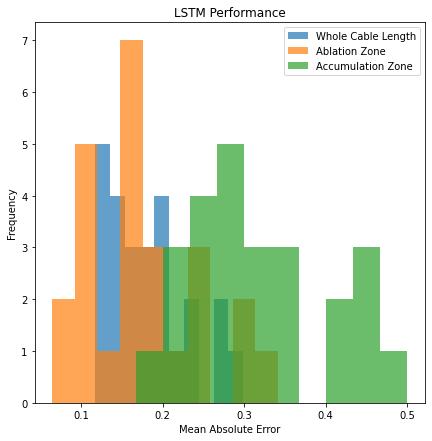

In [12]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
fig.patch.set_facecolor('white')

ax.hist(whole_cable, label='Whole Cable Length', lw=2, alpha = 0.7)
ax.hist(ablation_zone, label='Ablation Zone', lw=2, alpha = 0.7)
ax.hist(accumulation_zone, label='Accumulation Zone', lw=2, alpha = 0.7)
ax.set_ylabel('Frequency')
ax.set_xlabel('Mean Absolute Error')
ax.set_title('LSTM Performance')
ax.legend()